# Atividade Final
Discentes:
- LUCAS RENAN MAUES NUNES
- RENATO DANIEL DA CRUZ SANTOS
- JOSE FELIX DO CARMO NETO
- JHON WILLIAM RODRIGUES DO NASCIMENTO
- AIRTON LIMA MARINHO
- IGLISSON RUAN OLIVEIRA RAIOL 

In [ ]:
from google.colab.patches import cv_imshow
from skimage import io
import pandas as pd
import numpy as np
import statistics
import math

## Dados utilizado

In [ ]:
# rows = [7, 6, 7, 6, 7, 4, 5, 7, 5, 8, 6, 5, 5, 7, 8, 4, 7, 7, 7, 6]
# rows = [1,2,3,4,5,6,7,8,9,10]
# rows = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
rows = [10,15,15,17,18,21]
df = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv')
rows = df['#Passengers'].values
rows = [x for x in rows if math.isnan(x) == False] # remove os valores nulos

## Medidas de tendencia central

> **Média Amostral**

A implementação da media amostral acontece a partir do calculo da somatória de cada valor observado e dividindo sua soma pela por n, nesse caso, pela quantidade de valores existentes.

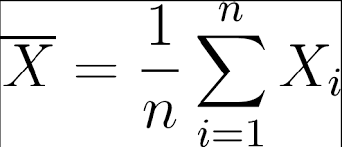

In [ ]:
media_img = io.imread("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR0Q250vLI42av8HXXHUSuaiKZNoe5KUq0ZWw&usqp=CAU")
cv_imshow(media_img)

In [ ]:
def media_amostral(dados):
  somatoriaDados=0
  for dado in dados:
    somatoriaDados += dado
  return somatoriaDados/len(dados)

> **Mediana Amostral**

O calculo da mediana amostrou ocorre a apartir da ordenação do dados recebidos e utilizando o N+1/2 é possível encontrar a posição do valor ao meio da amostra

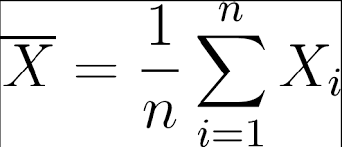

In [ ]:
mediana_img = io.imread("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR0Q250vLI42av8HXXHUSuaiKZNoe5KUq0ZWw&usqp=CAU")
cv_imshow(mediana_img)

In [ ]:
def mediana_amostral(dados):
  dados.sort()
  # calculo da mediana amostral
  for i in range(len(dados)):
    if len(dados) % 2 == 0: # se n for positivo
      index = int((len(dados) / 2))
      med = dados[index] - 0.5
    else: # se n for negativo
      index = int((len(dados)+1) / 2)
      med = dados[index-1]
  return med

> **Moda Amostral**

Para o calculo da moda amostral é feito a ordenação dos dados recebidos, em seguida a amostra é agrupada contando o numero de vezes que cada valor se repete e selecionando aquele com a maior frequencia como sendo a moda da amostra

In [ ]:
def moda_amostral(dados):
  dados.sort()
  amostra = []
  frequencia = []
  for dado in dados:
    if dado in amostra:
      pass
    else:
      amostra.append(dado)
      frequencia.append(dados.count(dado))

  # definindo a moda
  maior=0
  for i in range(len(frequencia)):
    if frequencia[i] > maior:
      maior = frequencia[i]
      moda = amostra[i]
  return moda

## Medidas de dispersão

> **Variancia**

O calculo da variância acontece a partir da subtração dos valores observados pela sua media, tudo isso elevado ao quadrado, e após se obter a somatoria de todos os valores, o resultado é dividido por total de valores menos um (n-1)

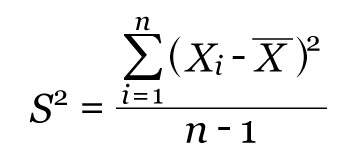

In [ ]:
var_img = io.imread("https://images.educamaisbrasil.com.br/content/banco_de_imagens/guia-de-estudo/D/devio-padrao-formula-variante-matematica.jpg")
cv_imshow(var_img)

In [ ]:
def variancia_amostral(dados):
  # Calcula a média aritmética
  media = statistics.mean(dados)

  va = 0
  for dado in dados:
    va += pow((dado-media), 2)
  varAmostral = va / (len(dados)-1)
  return varAmostral

> **Desvio Padrão**

O calculo do desvio padrão é uma variação do calculo da variancia amostral, em que se tira a raiz quadrada do resultado da variancia

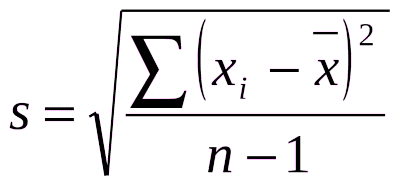

In [ ]:
desvioPadrao_img = io.imread("http://storage.ning.com/topology/rest/1.0/file/get/1802509391?profile=original")
cv_imshow(desvioPadrao_img)

In [ ]:
def desvio_padrao(variancia):
  dp = math.sqrt(variancia)
  return dp

> **Desvio médio absoluto**

A implementação do calculo do desvio medio acontece a partir da subtração do módulo de (x - media) dividido por n, ou seja, o resultado da subtração sempre é positivo e o resultado do desvio medio e a somatoria do resultado dessa subtração dividido pela quantidade total dos valores observados

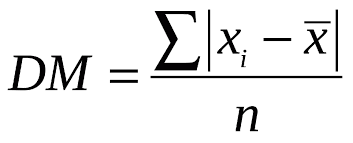

In [ ]:
desvioMedio_img = io.imread("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTVQeRMBW2bzfKrTY991N4AFF1ppG7byJHALA&usqp=CAU")
cv_imshow(desvioMedio_img)

In [ ]:
def desvio_medio_absoluto(dados):
  media = statistics.mean(dados)
  desvioMedio = 0
  for dado in dados:
    dma = (dado - media)
    # Soma as distâncias com a média e obtem o módulo
    if dma < 0:
      desvioMedio += dma * (-1) # torna tudo positivo
    else:
      desvioMedio += dma
  return round((desvioMedio/len(dados)),2)

## Separatrizes

> **Quartil**

As separatrizes foram definidas a partir da divisão da amostra observada em três partes. A primeira parte foi aplicar o "(n+1)/2" para encontrar o segundo quartil ou mediana, a partir disso é possivel encontrar o primeiro quartil "(n+1)/4" e o terceiro quartil "3*(n+1)/4" para encontrar as possições desses qurtis, ou simplismente dividir amostra em duas a partir da mediana pricipal e encontrar a media referente a cada quartil 

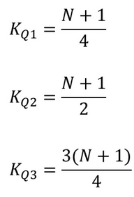

In [ ]:
separatrizes_img = io.imread("https://edtisensei.zendesk.com/hc/article_attachments/360072444692/quartis.png")
cv_imshow(separatrizes_img)

In [ ]:
def qualtil(dados):
  dados.sort()
  n = len(dados)
  q1=[]; q3=[]
  index = (n+1)/2
  for i in range(n):
    if i < (index-1):
      q1.append(dados[i])
    if i > (index-1):
      q3.append(dados[i])
  primQuantil = statistics.median(q1)
  segQuantil = statistics.median(dados)
  tercQuantil = statistics.median(q3)

  return primQuantil, segQuantil, tercQuantil

## RESULTADOS

In [ ]:
print("\n==========================================")
print("------ MEDIDAS DE TENDÊNCIA CENTRAL ------")
print("Media Amostral: ", media_amostral(rows))
print("Mediana Amostral: ", mediana_amostral(rows))
print("Moda Amostral: ", moda_amostral(rows))
print("\n------     MEDIDAS DE DISPERSÃO     ------")
print("Vairancia Amostral: ", variancia_amostral(rows))
print("Desvio Padrão Amostral: ", desvio_padrao(variancia_amostral(rows)))
print("Desvio Médio Absoluto: ", desvio_medio_absoluto(rows))
print("\n------         SEPARATRIZES         ------")
print("Primeiro Quartil: ",qualtil(rows)[0])
print("Segundo  Quartil: ",qualtil(rows)[1])
print("Terceito Quartil: ",qualtil(rows)[2])
print("==========================================")

print("\nUSANDO ALGUMAS FUNÇÕES ESTATÍSTICAS DO PYTHON")
print("Média: ", statistics.mean(rows))
print("Mediana: ", statistics.median(rows))
print("Moda: ", statistics.mode(rows))
print("-----------------")
print("Variancia: ", statistics.variance(rows))
print("Desvio Padrão: ", statistics.stdev(rows))
print("-----------------")


------ MEDIDAS DE TENDÊNCIA CENTRAL ------
Media Amostral:  280.2986111111111
Mediana Amostral:  266.5
Moda Amostral:  229

------     MEDIDAS DE DISPERSÃO     ------
Vairancia Amostral:  14392.006993006993
Desvio Padrão Amostral:  119.9666911813733
Desvio Médio Absoluto:  100.41

------         SEPARATRIZES         ------
Primeiro Quartil:  180.0
Segundo  Quartil:  265.5
Terceito Quartil:  361.0

USANDO ALGUMAS FUNÇÕES ESTATÍSTICAS DO PYTHON
Média:  280
Mediana:  265.5
Moda:  229
-----------------
Variancia:  14391
Desvio Padrão:  119.96249413879323
-----------------
